In [1]:
import numpy as np, healpy as hp, os, prjlib, curvedsky, plottools as pl, tools_qrec, tools_y, binning, analysis as ana
from matplotlib.pyplot import *

In [2]:
def load_cyx(param,qtau,qtbh,qtBH):
    cy = tools_y.init_compy(param.ids,masktype=0,ytype='nilc',ascale=1.0)
    fxtau = tools_y.init_cross(qtau,cy,param.ids,param.stag)
    fxtbh = tools_y.init_cross(qtbh,cy,param.ids,param.stag)
    fxtBH = tools_y.init_cross(qtBH,cy,param.ids,param.stag)
    return cy, fxtau, fxtbh, fxtBH

In [3]:
p0 = prjlib.init_analysis(dtype='dr3_nosz',wtype='LmaskDR3',fltr='none')
p1 = prjlib.init_analysis(dtype='dr3_NoSZ',wtype='LmaskDR3',fltr='cinv')

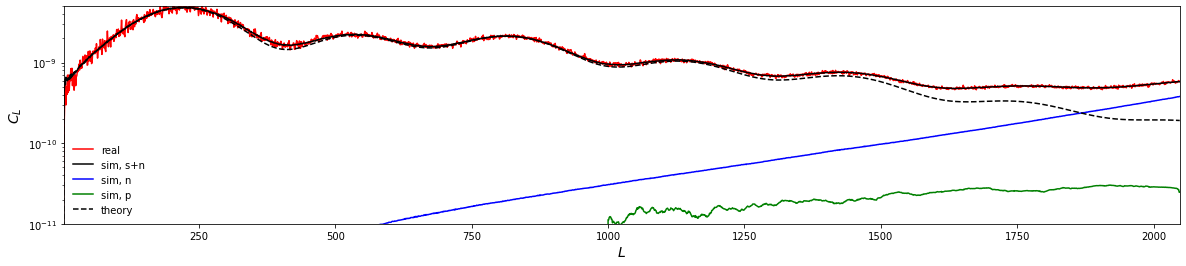

In [10]:
l, rcl0 = np.loadtxt(p0.fcmb.ocl,unpack=True,usecols=(0,1))
l, scl0, ncl0, pcl0, ocl0, vcl0 = np.loadtxt(p0.fcmb.scl,unpack=True,usecols=(0,1,2,3,4,8))
pl.plot_1dstyle(fsize=[20,4],ymin=1e-11,ymax=5e-9,xmin=2,ylog=True,xmax=2048)
plot(l,l**2*rcl0,'r-',label='real')
plot(l,l**2*ocl0,'k-',label='sim, s+n')
#plot(l,l**2*scl0,'g',label='sim, s')
plot(l,l**2*ncl0,'b',label='sim, n')
plot(l,l**2*pcl0,'g',label='sim, p')
plot(p0.l,p0.l**2*p0.lcl[0,:],'k--',label='theory')
legend()

In [11]:
qtau0, qlen0, qsrc0, qtbh0, qtBH0 = tools_qrec.init_quad(p0.ids,p0.stag,rlmin=100,rlmax=2048)
qtau1, qlen1, qsrc1, qtbh1, qtBH1 = tools_qrec.init_quad(p1.ids,p1.stag,rlmin=100,rlmax=2048)

NameError: name 'al1' is not defined

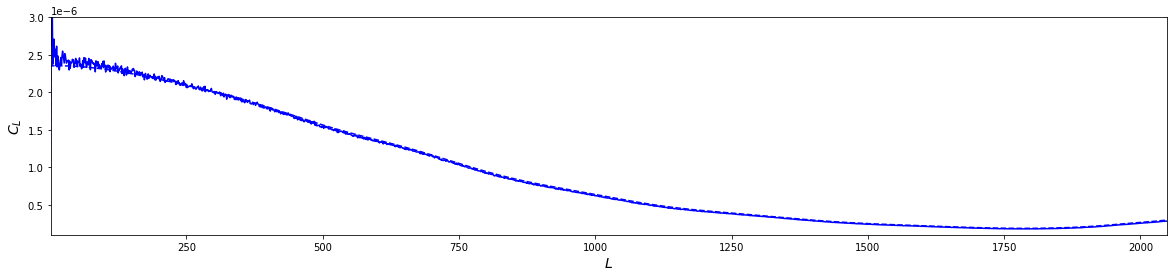

In [12]:
l, al0 = np.loadtxt(qtau0.f['TT'].al,unpack=True,usecols=(0,1))
l, n00 = np.loadtxt(qtau0.f['TT'].n0bs,unpack=True,usecols=(0,1))
l, al1 = np.loadtxt(qtau1.f['TT'].al,unpack=True,usecols=(0,1))
l, n01 = np.loadtxt(qtau1.f['TT'].n0bs,unpack=True,usecols=(0,1))
pl.plot_1dstyle(fsize=[20,4],ymin=1e-7,ymax=3e-6,xmin=1,xmax=2048)
plot(l,al0,'b--',label='norm (base)')
plot(l,n00,'b-',label='N0 (base)')
plot(l,al1,'g--',label='norm (base)')
plot(l,n01,'g-',label='N0 (base)')

In [7]:
cy0, fxtau0, fxtbh0, fxtBH0 = load_cyx(p0,qtau0,qtbh0,qtBH0)
cy1, fxtau1, fxtbh1, fxtBH1 = load_cyx(p1,qtau1,qtbh1,qtBH1)

NameError: name 'fxtbh0' is not defined

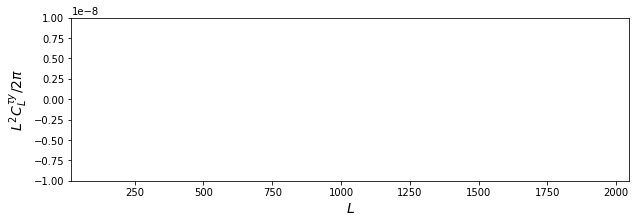

In [13]:
bn = 10
mb = binning.multipole_binning(bn,lmin=1,lmax=2048)
s = mb.bc**2/2/np.pi
pl.plot_1dstyle(fsize=[10,3],ymin=-1e-8,ymax=1e-8,ylab=r'$L^2C_L^{\tau y}/2\pi$')
#for xobj, Lab in [(fxtau,'normal'),(fxtbh,'bh'),(fxtBH,'BH')]:
for xobj, Lab in [(fxtbh0,'bh'),(fxtBH0,'BH')]:
    mcb, vcb, scb, ocb = binning.binned_spec(mb,xobj.xl,cn=1)
    errorbar(mb.bc,s*ocb,yerr=s*vcb,fmt='o',label=Lab)
    st = ana.PTEs(ocb,scb,comment='nosz,'+str(0),x1pte=True)
axhline(0.,color='k',ls='--')
legend()
show()